In [1]:
# Extract from https://github.com/StanfordVL/behavior/blob/main/behavior/benchmark/behavior_benchmark.py
import os
import numpy as np

from PIL import Image
from igibson.utils.utils import parse_config

from igibson import object_states
from igibson.utils.utils import restoreState

from igibson.action_primitives.fetch_robot_semantic_actions_env import FetchRobotSemanticActionEnv
from igibson.custom_utils import get_env_config, print_properties
from igibson.primitives_utils import get_names_of_visible_obj_inside, get_objects_inside, settle_physics 
import igibson.render_utils as render_utils

import warnings
warnings.filterwarnings("ignore")


 _   _____  _  _
(_) / ____|(_)| |
 _ | |  __  _ | |__   ___   ___   _ __
| || | |_ || || '_ \ / __| / _ \ | '_ \
| || |__| || || |_) |\__ \| (_) || | | |
|_| \_____||_||_.__/ |___/ \___/ |_| |_|



/miniconda/envs/igibson/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# Env config
task = "cleaning_out_drawers"
scene_id =  "Benevolence_1_int"

# Init env
sim_env = FetchRobotSemanticActionEnv(task, scene_id, verbose=True)

Rendering settings is None - going with the default settings!


### Dev

In [10]:
sim_env.robot.default_arm # where does this come from???

'0'

In [7]:
# is this what we're looking for? No, it's missing 'left_hand' and 'right_hand' or anything of the sort!
sim_env.robot._ag_obj_in_hand[sim_env.arm] 

KeyError: 'right_hand'

In [9]:
sim_env.robot.is_grasping() # we could change logic, as this accepts the candidate_obj in input as well
# actally it doesn't seem to work anyway...

<IsGraspingState.FALSE: -1>

### Official Demo

In [4]:
plan = [
    {'action':'go_to', 'params':{'obj_name':'cabinet.n.01_1'}},
    {'action':'open', 'params':{'obj_name':'cabinet.n.01_1'}}, # TODO: add better prompts for the outer loop + it's failing too often
    {'action':'grasp', 'params':{'obj_name':'bowl.n.01_1'}} # TODO: make the grasp more realistic somehow 
       ]

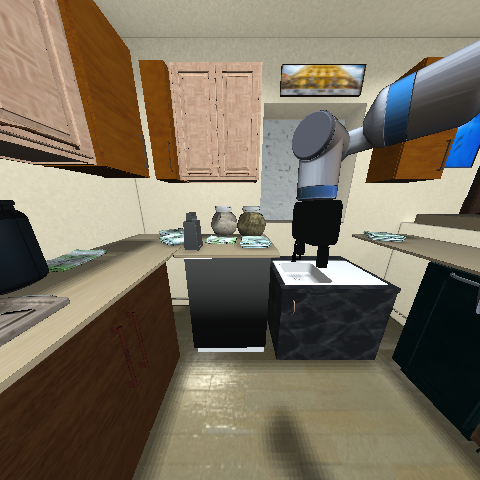

Candidate position failed robot distance test.
Start collision test.
End collision test.
Action {'action': 'go_to', 'params': {'obj_name': 'cabinet.n.01_1'}} executed. Success: True


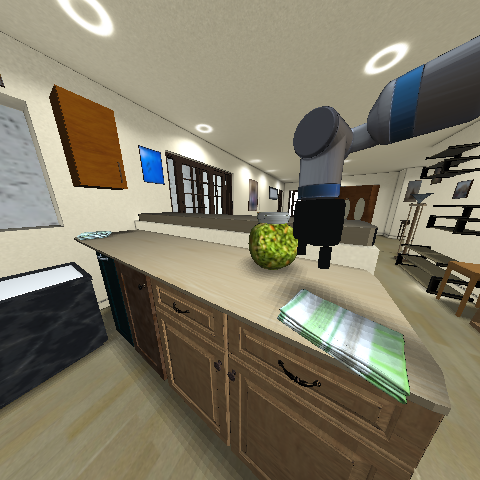

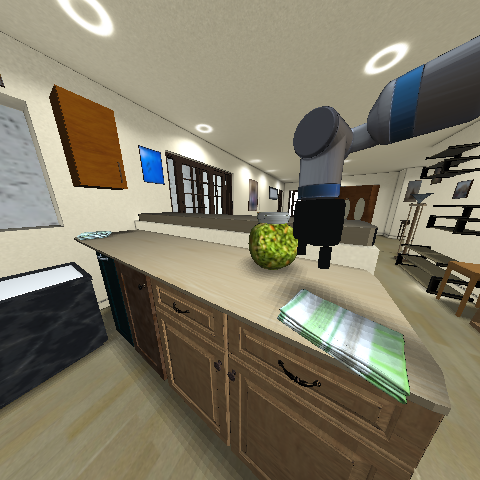

cabinet.n.01_1 is open: False
cabinet.n.01_1 is open: True


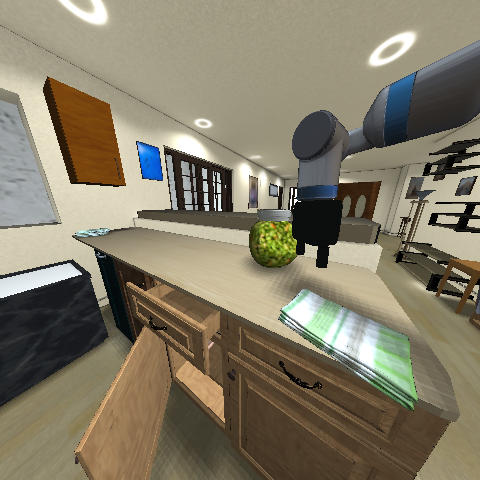

Making visible bowl.n.01_1
Success: True
Object successfully moved to a visible position inside the container (894 pixels visible)
bowl.n.01_1 is inside cabinet.n.01_1
bowl.n.01_1 is NOT colliding with any object
bowl.n.01_1 is visible: True - Pixels visible: 894
bowl.n.01_1 is near: False
Distance from shoulder: 1.112
bowl.n.01_2 is inside cabinet.n.01_1
bowl.n.01_2 is NOT colliding with any object
bowl.n.01_2 is visible: False - Pixels visible: 0
bowl.n.01_2 is near: False
Distance from shoulder: 1.060
piece_of_cloth.n.01_1 is inside cabinet.n.01_1
piece_of_cloth.n.01_1 is NOT colliding with any object
piece_of_cloth.n.01_1 is visible: False - Pixels visible: 0
piece_of_cloth.n.01_1 is near: False
Distance from shoulder: 1.107


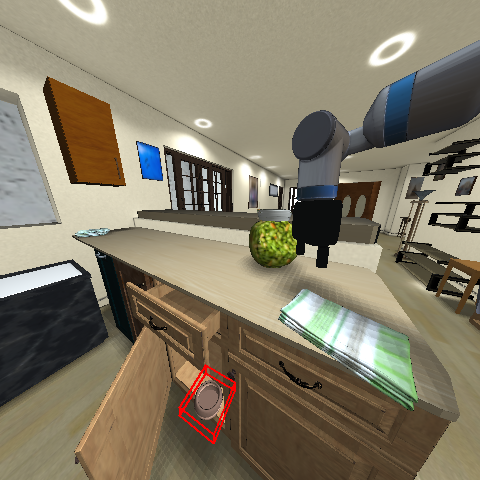

Making visible bowl.n.01_2
Success: True
Object successfully moved to a visible position inside the container (267 pixels visible)
bowl.n.01_1 is inside cabinet.n.01_1
bowl.n.01_1 is NOT colliding with any object
bowl.n.01_1 is visible: True - Pixels visible: 894
bowl.n.01_1 is near: False
Distance from shoulder: 1.112
bowl.n.01_2 is inside cabinet.n.01_1
bowl.n.01_2 is NOT colliding with any object
bowl.n.01_2 is visible: True - Pixels visible: 267
bowl.n.01_2 is near: False
Distance from shoulder: 0.904
piece_of_cloth.n.01_1 is inside cabinet.n.01_1
piece_of_cloth.n.01_1 is NOT colliding with any object
piece_of_cloth.n.01_1 is visible: False - Pixels visible: 0
piece_of_cloth.n.01_1 is near: False
Distance from shoulder: 1.107


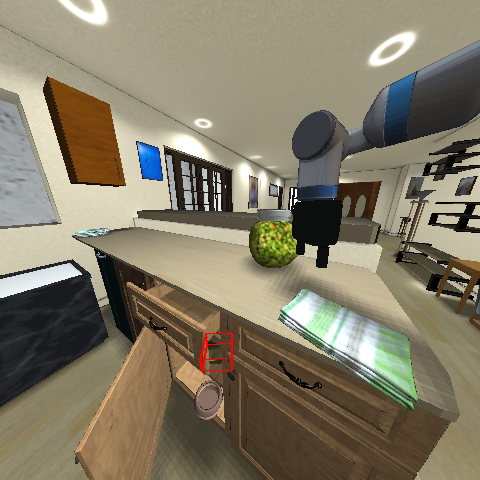

Making visible piece_of_cloth.n.01_1
Success: True
Object successfully moved to a visible position inside the container (938 pixels visible)
bowl.n.01_1 is inside cabinet.n.01_1
bowl.n.01_1 is NOT colliding with any object
bowl.n.01_1 is visible: True - Pixels visible: 523
bowl.n.01_1 is near: False
Distance from shoulder: 1.116
bowl.n.01_2 is inside cabinet.n.01_1
bowl.n.01_2 is NOT colliding with any object
bowl.n.01_2 is visible: True - Pixels visible: 267
bowl.n.01_2 is near: False
Distance from shoulder: 0.904
piece_of_cloth.n.01_1 is inside cabinet.n.01_1
piece_of_cloth.n.01_1 is NOT colliding with any object
piece_of_cloth.n.01_1 is visible: True - Pixels visible: 938
piece_of_cloth.n.01_1 is near: False
Distance from shoulder: 1.179


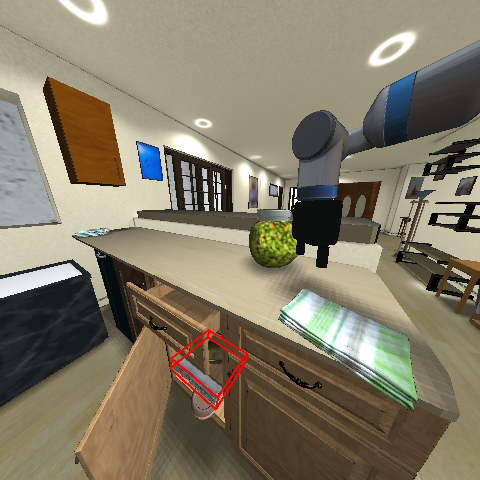

bowl.n.01_1 IsVisible:  True
bowl.n.01_1 IsInside:  True
bowl.n.01_1 IsNear:  True
Distance from shoulder: 1.116
bowl.n.01_2 IsVisible:  True
bowl.n.01_2 IsInside:  True
bowl.n.01_2 IsNear:  True
Distance from shoulder: 0.904
piece_of_cloth.n.01_1 IsVisible:  True
piece_of_cloth.n.01_1 IsInside:  True
piece_of_cloth.n.01_1 IsNear:  True
Distance from shoulder: 1.179
all_visible: True - all_inside: True - all_near: True
Action {'action': 'open', 'params': {'obj_name': 'cabinet.n.01_1'}} executed. Success: True


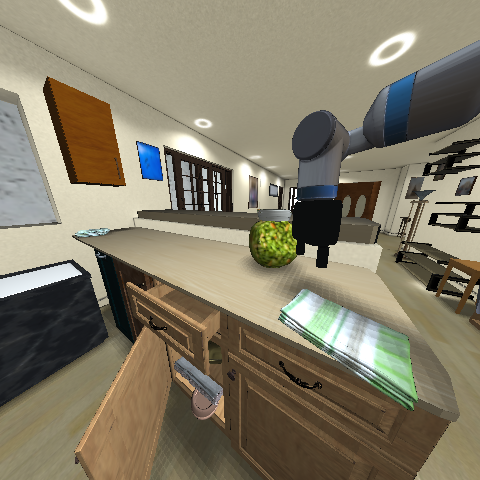

robot_pos: [-0.84734658  0.04057834  0.00672023], quaternion_pose: +0.870 +0.005i +0.009j -0.492k
Target trg_obj_pos: [-0.6006247  -0.17665574  0.65048857]


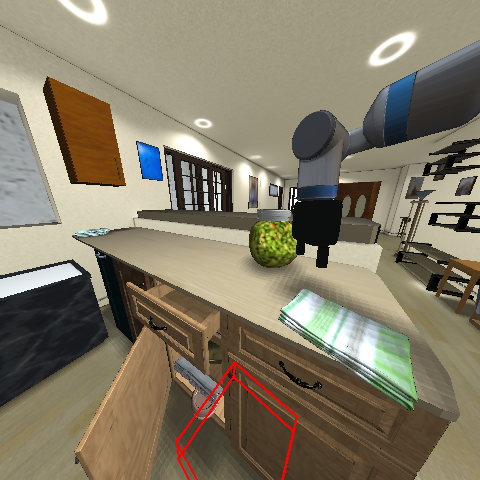

grasp_pose: (array([-0.71497636, -0.16450519,  0.63307915]), array([-0.54018893,  0.6181451 , -0.40792938,  0.39960754])) - object_direction: [ 0.99528232 -0.09685009 -0.00575949]


AttributeError: 'Fetch' object has no attribute '_parts'

In [5]:
image, symbolic_state = sim_env.get_state_and_image()

# TODO: Render image and print symbolic_state
image.show()

for action in plan:
    try:
        success, image, symbolic_state = sim_env.apply_action(action)
        print(f'Action {action} executed. Success: {success}')
        # TODO: Render image and print symbolic_state
        image.show()
        
        legal = True
        
    except ValueError as e:
        print(f"Action {action} failed: {e}")
        success = False
        legal = False